In [33]:
#imports
import pandas as pd
import csv
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

from geopy.geocoders import Nominatim 
import plotly.express as px   
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots

from dotenv import load_dotenv
import os
import pycountry
import stylecloud
from wordcloud import WordCloud 

import panel as pn
pn.extension('plotly')
import hvplot.pandas

In [34]:
# Read the Mapbox API key
load_dotenv()
map_box_api = os.getenv("mapbox")
px.set_mapbox_access_token(map_box_api)

In [35]:
# Read in International tourism number of arrivals 
intl_tourism_flights_arrival_path = Path('INTL_TOURISM_ARRIVALS.csv')
intl_tourism_flights_arrival = pd.read_csv(intl_tourism_flights_arrival_path)

In [36]:
# Look at head of dataframe
intl_tourism_flights_arrival.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Aruba,ABW,"International tourism, number of arrivals",ST.INT.ARVL,NaN,NaN,NaN,NaN,NaN,NaN,...,1469000.000,1481000.0,1667000.00,1739000.0,1832000.00,1758000.00,1863000.0,1897000.0,1951000.0,NaN
1,Afghanistan,AFG,"International tourism, number of arrivals",ST.INT.ARVL,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Africa Western and Central,AFW,"International tourism, number of arrivals",ST.INT.ARVL,NaN,NaN,NaN,NaN,NaN,NaN,...,8902380.178,10221030.4,10085818.94,10544624.0,13311681.73,13150775.34,NaN,NaN,NaN,NaN
3,Angola,AGO,"International tourism, number of arrivals",ST.INT.ARVL,NaN,NaN,NaN,NaN,NaN,NaN,...,481000.000,528000.0,650000.00,595000.0,592000.00,397000.00,261000.0,218000.0,218000.0,NaN
4,Albania,ALB,"International tourism, number of arrivals",ST.INT.ARVL,NaN,NaN,NaN,NaN,NaN,NaN,...,2932000.000,3514000.0,3256000.00,3673000.0,4131000.00,4736000.00,5118000.0,5927000.0,6406000.0,NaN


In [37]:
# Look at tail of dataframe
intl_tourism_flights_arrival.tail()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
212,Kosovo,XKX,"International tourism, number of arrivals",ST.INT.ARVL,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
213,Yemen,YEM,"International tourism, number of arrivals",ST.INT.ARVL,NaN,NaN,NaN,NaN,NaN,NaN,...,1175000.0,1282000.0,1323000.0,1218000.0,398000.0,NaN,NaN,NaN,NaN,NaN
214,South Africa,ZAF,"International tourism, number of arrivals",ST.INT.ARVL,NaN,NaN,NaN,NaN,NaN,NaN,...,12097000.0,13069000.0,14318000.0,14530000.0,13952000.0,15121000.0,14975000.0,15004000.0,14797000.0,NaN
215,Zambia,ZMB,"International tourism, number of arrivals",ST.INT.ARVL,NaN,NaN,NaN,NaN,NaN,NaN,...,920000.0,859000.0,915000.0,947000.0,932000.0,956000.0,1009000.0,1072000.0,1266000.0,NaN
216,Zimbabwe,ZWE,"International tourism, number of arrivals",ST.INT.ARVL,NaN,NaN,NaN,NaN,NaN,NaN,...,2423000.0,1794000.0,1833000.0,1880000.0,2057000.0,2168000.0,2423000.0,2580000.0,2294000.0,NaN


In [38]:
#Use GeoPy to obtain latitude and longitude for each country
country_names = intl_tourism_flights_arrival['Country Name']

longitude =[]
latitude =[]
geolocator = Nominatim(user_agent="Arrival")

for c in country_names.values:
    location = geolocator.geocode(c)
    if location is not None:
        latitude.append(location.latitude)
        longitude.append(location.longitude)
    else:
        print(f"Could not find Location for {c!r}")

In [39]:
# Create lat and lon columns for dataframe
intl_tourism_flights_arrival['Latitude'] = latitude
intl_tourism_flights_arrival['Longitude'] = longitude

In [40]:
# Check the head of dataframe to ensure latitude and longitude are added
intl_tourism_flights_arrival.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,Latitude,Longitude
0,Aruba,ABW,"International tourism, number of arrivals",ST.INT.ARVL,NaN,NaN,NaN,NaN,NaN,NaN,...,1667000.00,1739000.0,1832000.00,1758000.00,1863000.0,1897000.0,1951000.0,NaN,12.490300,-69.960984
1,Afghanistan,AFG,"International tourism, number of arrivals",ST.INT.ARVL,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.768006,66.238514
2,Africa Western and Central,AFW,"International tourism, number of arrivals",ST.INT.ARVL,NaN,NaN,NaN,NaN,NaN,NaN,...,10085818.94,10544624.0,13311681.73,13150775.34,NaN,NaN,NaN,NaN,5.267047,28.792421
3,Angola,AGO,"International tourism, number of arrivals",ST.INT.ARVL,NaN,NaN,NaN,NaN,NaN,NaN,...,650000.00,595000.0,592000.00,397000.00,261000.0,218000.0,218000.0,NaN,-11.877577,17.569124
4,Albania,ALB,"International tourism, number of arrivals",ST.INT.ARVL,NaN,NaN,NaN,NaN,NaN,NaN,...,3256000.00,3673000.0,4131000.00,4736000.00,5118000.0,5927000.0,6406000.0,NaN,41.000028,19.999962


In [41]:
# Check columns in dataframe
intl_tourism_flights_arrival.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', 'Latitude',
       'Longitude'],
      dtype='object')

In [42]:
# Delete columns we won't use
intl_tourism_flights_arrival.drop(['Indicator Name', 'Indicator Code', '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '2020'], axis=1, inplace=True)

In [43]:
# Check head of dataframe to ensure columns are dropped
intl_tourism_flights_arrival.head()

,Country Name,Country Code,1995,1996,1997,1998,1999,2000,2001,2002,...,2012,2013,2014,2015,2016,2017,2018,2019,Latitude,Longitude
0,Aruba,ABW,912000.000,957000.000,947000.000,906000.000,972000.000,1211000.000,1178000.000,1225000.00,...,1481000.0,1667000.00,1739000.0,1832000.00,1758000.00,1863000.0,1897000.0,1951000.0,12.490300,-69.960984
1,Afghanistan,AFG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.768006,66.238514
2,Africa Western and Central,AFW,2670705.934,3027134.733,3243144.347,3422652.337,3897975.031,4162850.003,4615887.342,4697120.11,...,10221030.4,10085818.94,10544624.0,13311681.73,13150775.34,NaN,NaN,NaN,5.267047,28.792421
3,Angola,AGO,9000.000,21000.000,45000.000,52000.000,45000.000,51000.000,67000.000,91000.00,...,528000.0,650000.00,595000.0,592000.00,397000.00,261000.0,218000.0,218000.0,-11.877577,17.569124
4,Albania,ALB,304000.000,287000.000,119000.000,184000.000,371000.000,317000.000,354000.000,470000.00,...,3514000.0,3256000.00,3673000.0,4131000.00,4736000.00,5118000.0,5927000.0,6406000.0,41.000028,19.999962


In [44]:
# Move Lat and Long columns to beginning of dataframe
def reorder_columns(dataframe, col_name, position):
    temp_col = dataframe[col_name]
    dataframe = dataframe.drop(columns=[col_name])
    dataframe.insert(loc=position, column=col_name, value=temp_col)
    return dataframe

intl_tourism_flights_arrival = reorder_columns(dataframe=intl_tourism_flights_arrival, col_name='Latitude', position=2)
intl_tourism_flights_arrival = reorder_columns(dataframe=intl_tourism_flights_arrival, col_name='Longitude', position=3)
intl_tourism_flights_arrival

,Country Name,Country Code,Latitude,Longitude,1995,1996,1997,1998,1999,2000,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Aruba,ABW,12.490300,-69.960984,912000.000,957000.000,947000.000,906000.000,972000.000,1211000.000,...,1394000.00,1.469000e+06,1481000.0,1667000.00,1739000.0,1832000.00,1758000.00,1863000.0,1897000.0,1951000.0
1,Afghanistan,AFG,33.768006,66.238514,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Africa Western and Central,AFW,5.267047,28.792421,2670705.934,3027134.733,3243144.347,3422652.337,3897975.031,4162850.003,...,11070796.45,8.902380e+06,10221030.4,10085818.94,10544624.0,13311681.73,13150775.34,NaN,NaN,NaN
3,Angola,AGO,-11.877577,17.569124,9000.000,21000.000,45000.000,52000.000,45000.000,51000.000,...,425000.00,4.810000e+05,528000.0,650000.00,595000.0,592000.00,397000.00,261000.0,218000.0,218000.0
4,Albania,ALB,41.000028,19.999962,304000.000,287000.000,119000.000,184000.000,371000.000,317000.000,...,2417000.00,2.932000e+06,3514000.0,3256000.00,3673000.0,4131000.00,4736000.00,5118000.0,5927000.0,6406000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,Kosovo,XKX,42.586958,20.902123,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
213,Yemen,YEM,16.347124,47.891527,NaN,NaN,NaN,NaN,NaN,NaN,...,1035000.00,1.175000e+06,1282000.0,1323000.00,1218000.0,398000.00,NaN,NaN,NaN,NaN
214,South Africa,ZAF,-28.816624,24.991639,4684000.000,5186000.000,5170000.000,5898000.000,6026000.000,6001000.000,...,11303000.00,1.209700e+07,13069000.0,14318000.00,14530000.0,13952000.00,15121000.00,14975000.0,15004000.0,14797000.0
215,Zambia,ZMB,-14.518912,27.558988,163000.000,264000.000,341000.000,362000.000,404000.000,457000.000,...,815000.00,9.200000e+05,859000.0,915000.00,947000.0,932000.00,956000.00,1009000.0,1072000.0,1266000.0


In [45]:
# Format dataframe to long data. 
new_intl_tourism_flights_arrival = intl_tourism_flights_arrival.melt(id_vars=["Country Name", "Country Code", "Latitude", "Longitude"], 
        var_name="Year", 
        value_name="Number of Arrivals")
new_intl_tourism_flights_arrival.head()

,Country Name,Country Code,Latitude,Longitude,Year,Number of Arrivals
0,Aruba,ABW,12.490300,-69.960984,1995,912000.000
1,Afghanistan,AFG,33.768006,66.238514,1995,NaN
2,Africa Western and Central,AFW,5.267047,28.792421,1995,2670705.934
3,Angola,AGO,-11.877577,17.569124,1995,9000.000
4,Albania,ALB,41.000028,19.999962,1995,304000.000


In [46]:
# Check and count nulls
new_intl_tourism_flights_arrival.isnull().sum()

Country Name            0
Country Code            0
Latitude                0
Longitude               0
Year                    0
Number of Arrivals    886
dtype: int64

In [47]:
# Remove nulls
new_intl_tourism_flights_arrival.dropna(inplace=True)
new_intl_tourism_flights_arrival.head()

,Country Name,Country Code,Latitude,Longitude,Year,Number of Arrivals
0,Aruba,ABW,12.490300,-69.960984,1995,912000.000
2,Africa Western and Central,AFW,5.267047,28.792421,1995,2670705.934
3,Angola,AGO,-11.877577,17.569124,1995,9000.000
4,Albania,ALB,41.000028,19.999962,1995,304000.000
6,United Arab Emirates,ARE,24.000249,53.999483,1995,2315000.000


In [48]:
#Check tail of dataframe
new_intl_tourism_flights_arrival.tail()

,Country Name,Country Code,Latitude,Longitude,Year,Number of Arrivals
5418,Vanuatu,VUT,-16.525507,168.106915,2019,256000.0
5419,Samoa,WSM,-13.769390,-172.120050,2019,181000.0
5422,South Africa,ZAF,-28.816624,24.991639,2019,14797000.0
5423,Zambia,ZMB,-14.518912,27.558988,2019,1266000.0
5424,Zimbabwe,ZWE,-18.455496,29.746841,2019,2294000.0


In [49]:
# Save the dataframe as a csv file
new_intl_tourism_flights_arrival.to_csv('new_intl_tourism_flights_arrival.csv')

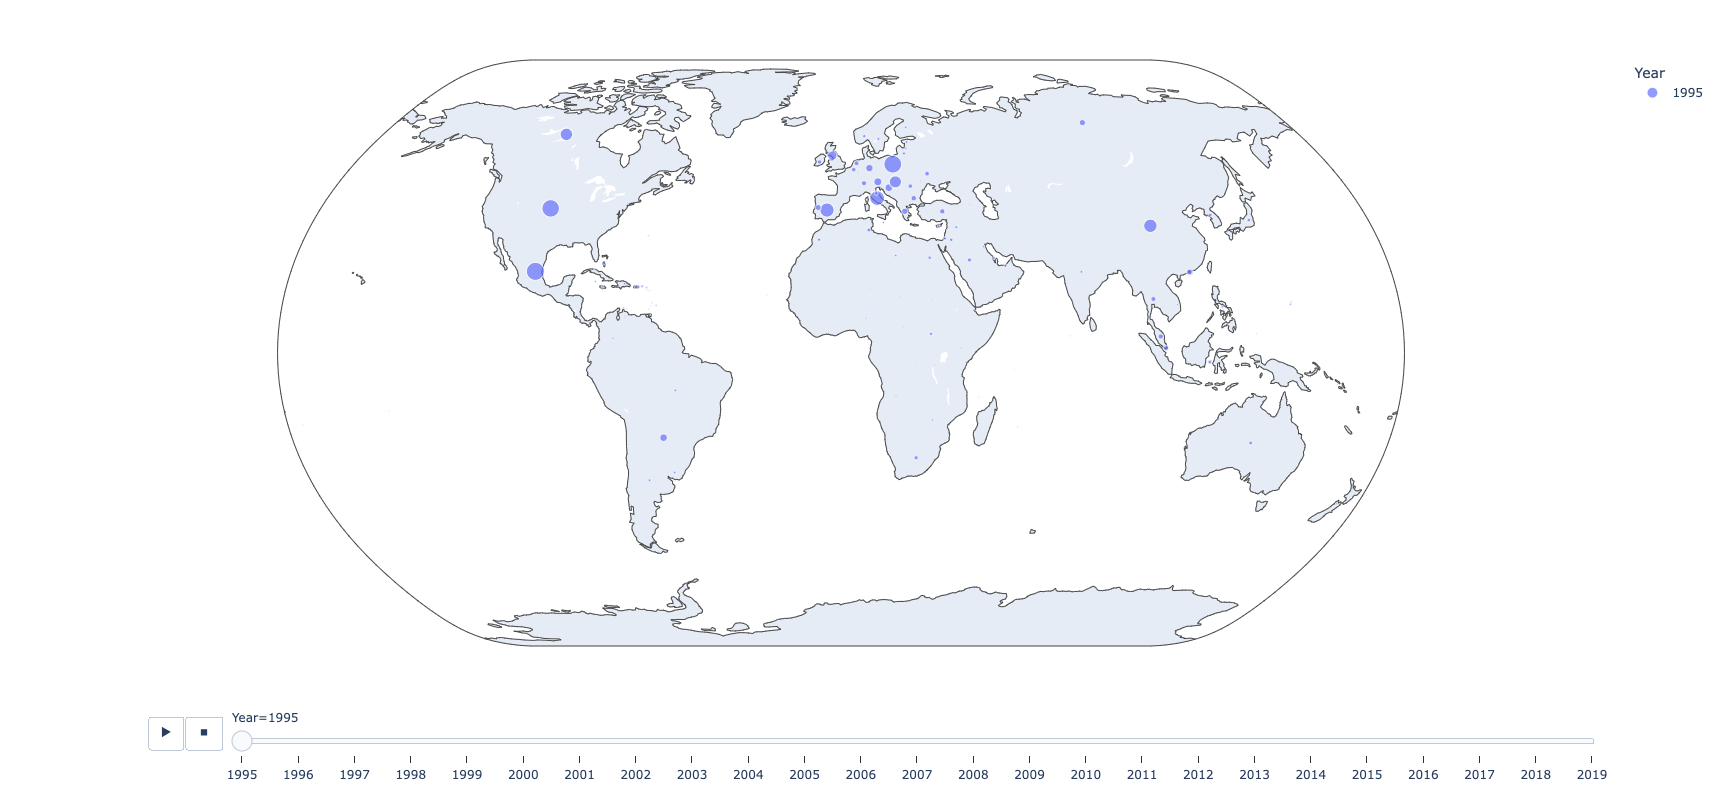

In [50]:
number_of_arrivals_per_year = px.scatter_geo(new_intl_tourism_flights_arrival, lat="Latitude", lon="Longitude", color="Year",
                     hover_name="Country Name", size="Number of Arrivals",
                     animation_frame="Year",
                     projection="natural earth",
                    width=1000,
                    height=800)
number_of_arrivals_per_year.show()

In [51]:
# Checking median
median_arrivals = new_intl_tourism_flights_arrival.groupby(["Year", "Country Name"])["Number of Arrivals"].median()
median_arrivals

Year  Country Name              
1995  Africa Western and Central    2.670706e+06
      Albania                       3.040000e+05
      Algeria                       5.200000e+05
      Angola                        9.000000e+03
      Antigua and Barbuda           4.470000e+05
                                        ...     
2019  Vanuatu                       2.560000e+05
      Vietnam                       1.800900e+07
      Virgin Islands (U.S.)         2.074000e+06
      Zambia                        1.266000e+06
      Zimbabwe                      2.294000e+06
Name: Number of Arrivals, Length: 4539, dtype: float64

In [52]:
# Checking mean
mean_arrivals = new_intl_tourism_flights_arrival.groupby(["Year", "Country Name"])["Number of Arrivals"].mean()
mean_arrivals

Year  Country Name              
1995  Africa Western and Central    2.670706e+06
      Albania                       3.040000e+05
      Algeria                       5.200000e+05
      Angola                        9.000000e+03
      Antigua and Barbuda           4.470000e+05
                                        ...     
2019  Vanuatu                       2.560000e+05
      Vietnam                       1.800900e+07
      Virgin Islands (U.S.)         2.074000e+06
      Zambia                        1.266000e+06
      Zimbabwe                      2.294000e+06
Name: Number of Arrivals, Length: 4539, dtype: float64

In [67]:
# Save the dataframe as a csv file
mean_arrivals.to_csv('mean_arrivals.csv')

In [65]:
# Use hvplot to create an interactive line chart of the mean number of arrivals
average_number_of_arrivals_hvplot = mean_arrivals.hvplot(
    x="Year",
    y="Number of Arrivals",
    kind="line",
    ylabel="Average Number of Arrivals Per Year",
    groupby="Country Name",
    color="purple",
    width=1000,
    height=800
)
average_number_of_arrivals_hvplot

:DynamicMap   [Country Name]
   :Curve   [Year]   (Number of Arrivals)

In [74]:
top_10_most_travelled_to_countries = new_intl_tourism_flights_arrival.groupby(["Country Name"]).mean().nlargest(10, "Number of Arrivals").sort_values(ascending=True, by="Number of Arrivals")
top_10_most_travelled_to_countries.reset_index(inplace=True)
top_10_most_travelled_to_countries.head(10)

,Country Name,Latitude,Longitude,Number of Arrivals
0,Canada,61.066692,-107.991707,3.506952e+07
1,Hungary,47.181758,19.506094,4.085588e+07
2,Croatia,45.564344,17.011895,4.404808e+07
3,Italy,42.638426,12.674297,7.051658e+07
4,Poland,52.215933,19.134422,7.218648e+07
5,Spain,39.326069,-4.837979,9.136748e+07
6,Mexico,22.500048,-100.000037,9.224772e+07
7,China,35.000074,104.999927,1.122087e+08
8,United States,39.783730,-100.445882,1.282295e+08
9,France,46.603354,1.888334,1.926844e+08


In [75]:
# Save the dataframe as a csv file
top_10_most_travelled_to_countries.to_csv('top_10_most_travelled_to_countries.csv')

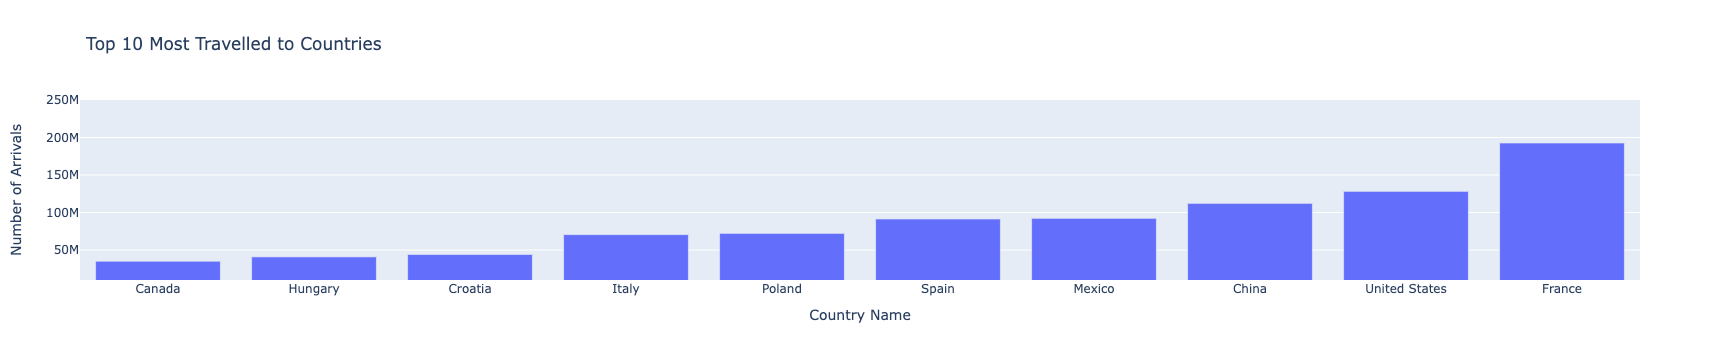

In [77]:
# Plotting the data from the top 10 most travelled to countries
top_10_most_travelled_to_countries_plot = px.bar(
    top_10_most_travelled_to_countries,
    x="Country Name",
    y="Number of Arrivals",
    range_y=[10000000, 250000000],
    title="Top 10 Most Travelled to Countries",
)
top_10_most_travelled_to_countries_plot



In [ ]:
#geopy in action
country_names = new_intl_tourism_flights_arrival['Country Name']

longitude =[]
latitude =[]
geolocator = Nominatim(user_agent="Arrive")

for c in country_names.values:
    location = geolocator.geocode(c)
    if location is not None:
        latitude.append(location.latitude)
        longitude.append(location.longitude)
    else:
        print(f"Could not find Location for {c!r}")

In [ ]:
new_intl_tourism_flights_arrival['Latitude'] = latitude
new_intl_tourism_flights_arrival['Longitude'] = longitude

In [ ]:
fig = px.scatter_geo(new_intl_tourism_flights_arrival, lat="Country Name", color="continent",
                     hover_name="country", size="Number of Arrivals",
                     animation_frame="Year",
                     projection="natural earth")
fig.show()

In [ ]:
intl_tourism_flights_arrival.columns

In [ ]:
#Delete columns not needed
intl_tourism_flights_arrival.drop([
    'Indicator Name', 'Indicator Code', '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2020'], axis = 1, inplace=True)

In [ ]:
intl_tourism_flights_arrival.head()

In [ ]:
intl_tourism_flights_arrival.isnull().sum()

In [ ]:
intl_tourism_flights_arrival.dropna(inplace=True)
intl_tourism_flights_arrival.head()

In [ ]:
#geopy in action
country_names = intl_tourism_flights_arrival['Country Name']

longitude =[]
latitude =[]
geolocator = Nominatim(user_agent="Arrive")

for c in country_names.values:
    location = geolocator.geocode(c)
    if location is not None:
        latitude.append(location.latitude)
        longitude.append(location.longitude)
    else:
        print(f"Could not find Location for {c!r}")

In [ ]:
intl_tourism_flights_arrival['Latitude'] = latitude
intl_tourism_flights_arrival['Longitude'] = longitude

In [ ]:
intl_tourism_flights_arrival.head()

In [ ]:
#intl_tourism_flights_arrival.isnull().sum()

In [ ]:
#intl_tourism_flights_arrival.dropna(inplace=True)
#intl_tourism_flights_arrival.head()

In [ ]:
# Create a scatter geo to analyze 2019 international tourist arrivals info https://plotly.com/python/scattermapbox/
scatter_geo = px.scatter_geo(
    intl_tourism_flights_arrival, 
    lat="Latitude", 
    lon="Longitude",     
    color="Country Code", 
    size="2019",
    title="2019 International Tourist Arrivals",
    color_continuous_scale=px.colors.sequential.Inferno, 
    hover_name="Country Name",
    projection="equirectangular",
    #size=20,
    #zoom=10,
    width=1000, 
    height=1000
)
scatter_geo.show()

In [ ]:
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate("Country Name"))

In [ ]:
#density_mapbox = px.density_mapbox(intl_tourism_flights_arrival, lat="Latitude", lon="Longitude", z="2019", center=dict(lat=0, lon=180), radius=20, zoom=0, hover_name="Country Name",
                        #mapbox_style="satellite", width=1000, height=1000)
#density_mapbox.show()